In [1]:
import os
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("../tables/with-1st-per/heir-actors.csv",sep=",")

In [ ]:
data.at[5, 'name'] = 'Mortimer Delvile'

In [ ]:
data["name"] = data["name"].str.replace("_", " ", regex=True)

In [ ]:
data

In [ ]:
data[["name", "genre", "percentage"]].plot(kind="barh",y="percentage", figsize=(20,14), legend=False,
                    color="grey", alpha=0.75, fontsize="xx-large")

In [ ]:
ax = data[["name", "genre", "percentage"]].groupby("name").median().sort_values(by = "percentage", ascending=True)\
                    .plot(kind="barh",y="percentage", figsize=(20,14), legend=False,
                    color="grey", alpha=0.75, fontsize="xx-large")

#ax.legend(["Percentage of benefactor roles per novel"],
#           scatterpoints=1,
#           loc='lower right',
#           ncol=1,
#           markerscale=0.5,
#           fontsize=20)

ax.axvline(data["percentage"].median(), 
           color='red', linewidth=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xticks(rotation=90)

ax.set_ylabel("", rotation=90, fontsize="x-large")
#ax.set_xlabel("Percentage of all actor roles",fontsize="x-large")

#ax.figure.savefig("/Users/au564346/Desktop/all_heirs_actors.png", dpi=300, bbox_inches = "tight")

# Read in tables of actors and benefactors

In [ ]:
actors = pd.read_csv("../tables/with-1st-per/heiress-actors.csv",sep=",")
benefactors = pd.read_csv("../tables/with-1st-per/heir-actors.csv",sep=",")

In [ ]:
heiresses = pd.read_csv("../tables/no-1st-per/heiress-actors.csv",sep=",")
heirs = pd.read_csv("../tables/no-1st-per/heir-actors.csv",sep=",")
suitors = pd.read_csv("../tables/no-1st-per/suitor-actors.csv",sep=",")
moneyed = pd.read_csv("../tables/no-1st-per/moneyed-actors.csv",sep=",")
unmoneyed = pd.read_csv("../tables/no-1st-per/unmoneyed-actors.csv",sep=",")

## Groupby time

In [ ]:
heiresses

In [ ]:
heiress_cent = heiresses.groupby(["century", "percentage"]).size().reset_index().groupby("century").median()
heirs_cent = heirs.groupby(["century", "percentage"]).size().reset_index().groupby("century").median()
suitors_cent = suitors.groupby(["century", "percentage"]).size().reset_index().groupby("century").median()
moneyed_cent = moneyed.groupby(["century", "percentage"]).size().reset_index().groupby("century").median()
unmoneyed_cent = unmoneyed.groupby(["century", "percentage"]).size().reset_index().groupby("century").median()

## Plot NEW

In [ ]:
heiress_cent = heiresses.groupby("century").agg([np.median, double_std, sp.sem])["percentage"]
heirs_cent = heirs.groupby("century").agg([np.median, double_std, sp.sem])["percentage"]
suitors_cent = suitors.groupby("century").agg([np.median, double_std, sp.sem])["percentage"]
moneyed_cent = moneyed.groupby("century").agg([np.median, double_std, sp.sem])["percentage"]
unmoneyed_cent = unmoneyed.groupby("century").agg([np.median, double_std, sp.sem])["percentage"]

In [ ]:
df1700 = pd.DataFrame({"Century": 1700,
                    "Heiresses":heiresses["percentage"][heiresses["century"]==1700],
                   "Heirs":heirs["percentage"][heirs["century"]==1700], 
                   "Suitors":suitors["percentage"][suitors["century"]==1700],
                   "Unmoneyed":unmoneyed["percentage"][unmoneyed["century"]==1700],
                   "Moneyed":moneyed["percentage"][moneyed["century"]==1700]})

df1800 = pd.DataFrame({"Century": 1800,
                    "Heiresses":heiresses["percentage"][heiresses["century"]==1800],
                   "Heirs":heirs["percentage"][heirs["century"]==1800], 
                   "Suitors":suitors["percentage"][suitors["century"]==1800],
                   "Unmoneyed":unmoneyed["percentage"][unmoneyed["century"]==1800],
                   "Moneyed":moneyed["percentage"][moneyed["century"]==1800]})

In [ ]:
props = dict(boxes="gray", whiskers="gray", medians="red", caps="gray")
ax1700 = pd.DataFrame({"Heiresses":heiresses["percentage"][heiresses["century"]==1700],
                   "Heirs":heirs["percentage"][heirs["century"]==1700], 
                   "Suitors":suitors["percentage"][suitors["century"]==1700],
                   "Unmoneyed":unmoneyed["percentage"][unmoneyed["century"]==1700],
                   "Moneyed":moneyed["percentage"][moneyed["century"]==1700]}).plot(kind="box",
                                                                                    figsize=(20,10),
                                                                                    fontsize = 14,
                                                                                    color=props)
ax1700.set_ylabel("Percentage")
ax1700.spines['right'].set_visible(False)
ax1700.spines['top'].set_visible(False)
#ax1700.figure.savefig("/Users/au564346/Desktop/all_character_types_by_century1700.png", dpi=300, bbox_inches = "tight")

In [ ]:
ax1800 = pd.DataFrame({"Heiresses":heiresses["percentage"][heiresses["century"]==1800],
                   "Heirs":heirs["percentage"][heirs["century"]==1800], 
                   "Suitors":suitors["percentage"][suitors["century"]==1800],
                   "Unmoneyed":unmoneyed["percentage"][unmoneyed["century"]==1800],
                   "Moneyed":moneyed["percentage"][moneyed["century"]==1800]}).plot(kind="box",
                                                                                    figsize=(20,10),
                                                                                    fontsize = 14, 
                                                                                    color=props)

ax1800.set_ylabel("Percentage")
ax1800.spines['right'].set_visible(False)
ax1800.spines['top'].set_visible(False)
#ax1800.figure.savefig("/Users/au564346/Desktop/all_character_types_by_century100.png", dpi=300, bbox_inches = "tight")

In [ ]:
df1700_2 = pd.DataFrame({"Century": 1700,
                         "Heiresses":heiresses["percentage"][heiresses["century"]==1700],
                         "Heirs":heirs["percentage"][heirs["century"]==1700],
                    "Suitors":suitors["percentage"][suitors["century"]==1700],
                   "Unmoneyed":unmoneyed["percentage"][unmoneyed["century"]==1700],
                   "Moneyed":moneyed["percentage"][moneyed["century"]==1700]})
df1800_2 = pd.DataFrame({"Century": 1800,
                        "Heiresses":heiresses["percentage"][heiresses["century"]==1800],
                         "Heirs":heirs["percentage"][heirs["century"]==1800],
                    "Suitors":suitors["percentage"][suitors["century"]==1800],
                   "Unmoneyed":unmoneyed["percentage"][unmoneyed["century"]==1800],
                   "Moneyed":moneyed["percentage"][moneyed["century"]==1800]})

In [ ]:
df = df_genre1.append(df_genre2)

In [ ]:
df

In [ ]:
df_genre1= pd.DataFrame({"Genre": heiresses["genre"],
                         "Role": "Heiress",
                    "Percentage":heiresses["percentage"]})
df_genre2= pd.DataFrame({"Genre": heirs["genre"],
                         "Role": "Heir",
                    "Percentage":heirs["percentage"]})

In [ ]:
tst2 = (df.set_index('Genre', append=True)  # set E as part of the index
      .stack()                      # pull A - D into rows 
      .to_frame()                   # convert to a dataframe
      .reset_index()                # make the index into reg. columns
      .rename(columns={'level_2': 'Role', 0: 'Percentage'})  # rename columns
      .drop('level_0', axis='columns')   # drop junk columns
)

In [ ]:
df[]

In [ ]:
sns.boxplot(x="Role", y="Percentage",data=df,
                order=["Heiress","Heir"],
                color="gray")

In [ ]:
plt.figure(figsize=(20, 10))

ax = sns.boxplot(x="Genre", y="Percentage", hue="Role", data=df,
                order=["Courtship","Gothic", "Realism", "Picaresque"],
                color="gray")#,medianprops={'color':'red'})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("")

# Define some hatches
#hatches = cycle(['///', 'x'])
#for i, patch in enumerate(ax.artists):
    # Boxes from left to right
#    hatch = next(hatches)
#    patch.set_hatch(hatch)

a_val = 0.6
circ1 = matplotlib.patches.Patch(facecolor="gray",alpha=a_val,hatch='///',label='1700')
circ2= matplotlib.patches.Patch(facecolor="black",alpha=a_val,hatch='x',label='1800')
    
ax.legend(scatterpoints=1,
           loc='best',
           #handles = [circ1,circ2],
           ncol=1,
           markerscale=0.5,
           fontsize=16,
           fancybox=True, 
           shadow=True)

plt.show()
ax.figure.savefig("/Users/au564346/Desktop/V2_heiresses+heirs_by_century.jpeg", dpi=300, bbox_inches = "tight")

In [ ]:
df["Genre"] = df["Genre"].apply(lambda x: x.capitalize())

In [ ]:
plt.figure(figsize=(20, 10))

ax = sns.boxplot(x="Role", y="Percentage", hue="Century", data=tst2, color="gray",order=["Heiresses","Heirs","Suitors","Moneyed", "Unmoneyed"])#,medianprops={'color':'red'})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("")


# Define some hatches
#hatches = cycle(['///', 'x'])
#for i, patch in enumerate(ax.artists):
    # Boxes from left to right
#    hatch = next(hatches)
#    patch.set_hatch(hatch)

a_val = 0.6
circ1 = matplotlib.patches.Patch(facecolor="gray",alpha=a_val,hatch='///',label='1700')
circ2= matplotlib.patches.Patch(facecolor="black",alpha=a_val,hatch='x',label='1800')

ax.legend(scatterpoints=1,
           loc='best',
           #handles = [circ1,circ2],
           ncol=1,
           markerscale=0.5,
           fontsize=16,
           fancybox=True, 
           shadow=True)

plt.show()
ax.figure.savefig("V2_all_characters_by_century.jpeg", dpi=300, bbox_inches = "tight")

In [ ]:
ks_2samp(jnd["Unmoneyed"][jnd["Century"]==1700], jnd["Unmoneyed"][jnd["Century"]==1800])

In [ ]:
ax = df.plot(kind="bar",figsize=(20,10), 
             color=["black","dimgray","gray","darkgray","lightgray"],
             fontsize=14, alpha=0.75, rot=0,
             title="All Character Types by Century")

ax.set_xlabel("Genre")
ax.set_ylabel("Percentage")

bars = ax.patches
hatches = ''.join(h*len(df) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    
handles, labels = ax.get_legend_handles_labels()

ax.legend(scatterpoints=1,
           loc='upper center',
           ncol=1,
           markerscale=0.5,
           fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel("Average Character Agency (Median)", rotation=90, fontsize="x-large")
ax.set_xlabel("Century",fontsize="x-large")

## OLD


In [ ]:
df = pd.DataFrame({"Heiresses":heiress_cent["percentage"],
                   "Heirs":heirs_cent["percentage"], 
                   "Suitors":suitors_cent["percentage"],
                   "Unmoneyed":unmoneyed_cent["percentage"],
                   "Moneyed":moneyed_cent["percentage"]})
df.sort_values(by = ["Heiresses","Heirs","Suitors","Unmoneyed","Moneyed"], ascending=False)

ax = df.plot(kind="bar",figsize=(20,10), 
             color=["black","dimgray","gray","darkgray","lightgray"],
             fontsize=14, alpha=0.75, rot=0,
             title="All Character Types by Century")

ax.set_xlabel("Genre")
ax.set_ylabel("Median Percentage")

bars = ax.patches
hatches = ''.join(h*len(df) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    
handles, labels = ax.get_legend_handles_labels()

ax.legend(scatterpoints=1,
           loc='upper center',
           ncol=1,
           markerscale=0.5,
           fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel("Average Character Agency (Median)", rotation=90, fontsize="x-large")
ax.set_xlabel("Century",fontsize="x-large")


#ax.figure.savefig("/Users/au564346/Desktop/all_character_types_by_century.png", dpi=300, bbox_inches = "tight")
#df.to_csv("../viz/new/comparisons/ALL-no-1st.ByGenre.csv",sep=",")

In [ ]:
actor_genre = actors.groupby("genre").median()
bene_genre = benefactors.groupby("genre").median()

df = pd.DataFrame({"Heiresses":actor_genre["percentage"],"Heirs":bene_genre["percentage"]})
df.sort_values(by = ["Heiresses","Heirs"], ascending=False)

ax = df.plot(kind="bar",figsize=(20,10), 
             color=["grey"], 
             fontsize=14, alpha=0.75, rot=0,
             title="Heiresses vs Heirs by Century")

bars = ax.patches
hatches = ''.join(h*len(df) for h in 'x')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels),
          scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale=0.5,
           fontsize=16)

ax.set_xlabel("Century", rotation=0, fontsize="x-large")
ax.set_ylabel("Average percentage of actor roles (median)",fontsize="x-large")

#ax.figure.savefig("/Users/au564346/Desktop/heiresses-vs-heirs-century.png", dpi=300, bbox_inches = "tight")

#ax.figure.savefig("../viz/new/heiresses/no-1st-per/viz/heiress-by-genre.png")
#df.to_csv("../viz/new/heiresses/no-1st-per/csv/heiress-by-genre.csv", sep=",")
#ax.figure.savefig("../viz/new/comparisons/wards-vs-guardians/no-1st-per/viz/wards-vs-guardiansby-genre.png")
#df.to_csv("../viz/new/comparisons/wards-vs-guardians/no-1st-per/csv/wards-vs-guardians-by-genre.csv",sep=",")

In [ ]:
max_actors = []
max_bene = []

# For all novels
for folder in sorted(os.listdir("../in/manually_corrected")):
    path = "../in/manually_corrected/" + folder + "/"
    #print(path)
    # if this is a directory
    if os.path.isdir(path):

        # read filenames
        for filename in os.listdir(path):
            # find max Actors, adding novel title 
            if filename.endswith("-joined-actors.csv"):
                df = pd.read_csv(path+filename, header=0)
                df["novel"] = folder
                df["percentage"] = pd.to_numeric(df["percentage"])
                most = df.iloc[df["percentage"].idxmax()].values
                max_actors.append(tuple(most))

# Create DataFrames from lists
max_all_actors = pd.DataFrame(max_actors, columns=['name', 'percentage','role', 'author', 'novel'])\
                                .sort_values(by = "percentage", ascending=True)

In [ ]:
max_all_actors= max_all_actors.sort_values(by="novel")

In [ ]:
max_all_actors["genre"] = ["Courtship", "Realism", "Courtship", "Realism", "Courtship", "Realism", "Courtship", "Gothic", 
                           "Realism", "Realism", "Gothic", "Gothic", "Realism", "Gothic", "Gothic", "Courtship", "Realism",
                          "Picaresque", "Gothic", "Realism", "Picaresque", "Gothic", "Gothic", "Realism", "Gothic",
                          "Courtship", "Courtship", "Gothic", "Picaresque"]

In [ ]:
max_all_actors.to_csv("/Users/au564346/Desktop/data.csv", index=False)

In [10]:
max_all_actors = pd.read_csv("/Users/au564346/Desktop/all.csv", sep="\t")

In [11]:
tf = max_all_actors[["name", "genre", "percentage"]].sort_values(by = "percentage", ascending=True).reset_index()

In [12]:
tf

,index,name,genre,percentage
0,28,Lucretia (Lu),Gothic,6.441943
1,27,Mrs_Rayland (OMH),Courtship,6.451532
2,26,Dorothea (Mi),Realism,6.785398
3,25,Adela_Waltham (De),Realism,8.242064
4,24,George_Venables (Ma),Courtship,8.432900
5,23,Captain_Booth (Am),Courtship,9.235157
6,22,Emmeline (EOoC),Gothic,9.797508
7,21,Tom_Jones (TJ),Picaresque,9.808552
8,20,Nicodemus_Boffin (OMF),Realism,10.556698
9,19,Sir_Percival (WiW),Gothic,10.648231


In [3]:
max_all_actors["name"] = max_all_actors["name"].apply(lambda x: x.replace("_", " "))

In [13]:
tf = max_all_actors.sort_values("percentage", ascending=False).reset_index()

In [14]:
data = tf

In [ ]:
adata["genre"] = data["genre"].apply(lambda x: x.capitalize())

In [ ]:
data = data.sort_values("percentage", ascending=False).reset_index()
data.to_csv("/Users/au564346/Desktop/data.csv")

In [ ]:
data = pd.read_csv("/Users/au564346/Desktop/heirs.csv", sep="\t")

In [ ]:
data = data.sort_values("percentage", ascending=False).reset_index()

In [16]:
data["name"] = data["name"].apply(lambda x: x.replace("_", " "))

In [28]:
data

,name,percentage,role,author,novel,genre
0,Emily St. Aubert (MoU),31.001435,"heiress, ward",female,The Mysteries of Udolpho,Gothic
1,Lord Colambre (TA),24.176210,"heir, suitor",female,TheAbsentee,Realism
2,Lady Anna (LA),21.589552,heiress,male,LadyAnna,Realism
3,Catherine (NA),19.791092,heiress,female,Northanger Abbey,Gothic
4,Lady Isabella of Vicenza (CoO),18.710838,moneyed,male,TheCastleofOtranto,Gothic
5,Mr Glanville (FQ),18.472000,suitor,female,TheFemaleQuixote,Courtship
6,Ester Summerson (BH),17.350259,"unmoneyed, ward",male,Bleak House,Realism
7,Cecilia (Ce),16.997111,"heiress, ward",female,Cecilia,Courtship
8,Sir Hugh Tyrold (Ca),15.266775,"guardian, moneyed",female,Camilla,Courtship
9,Emma Woodhouse (Em),15.091268,heiress,female,Emma,Courtship


In [19]:
data = data[data["name"] != "Pip (GE)"]
data = data[data["name"] != "Maud (US)"]
data = data[data["name"] != "Jane Eyre (JE)"]
data = data[data["name"] != "Roderick Random (AoRR)"]
data = data[data["name"] != "Gabriel Outcast (MT)"]

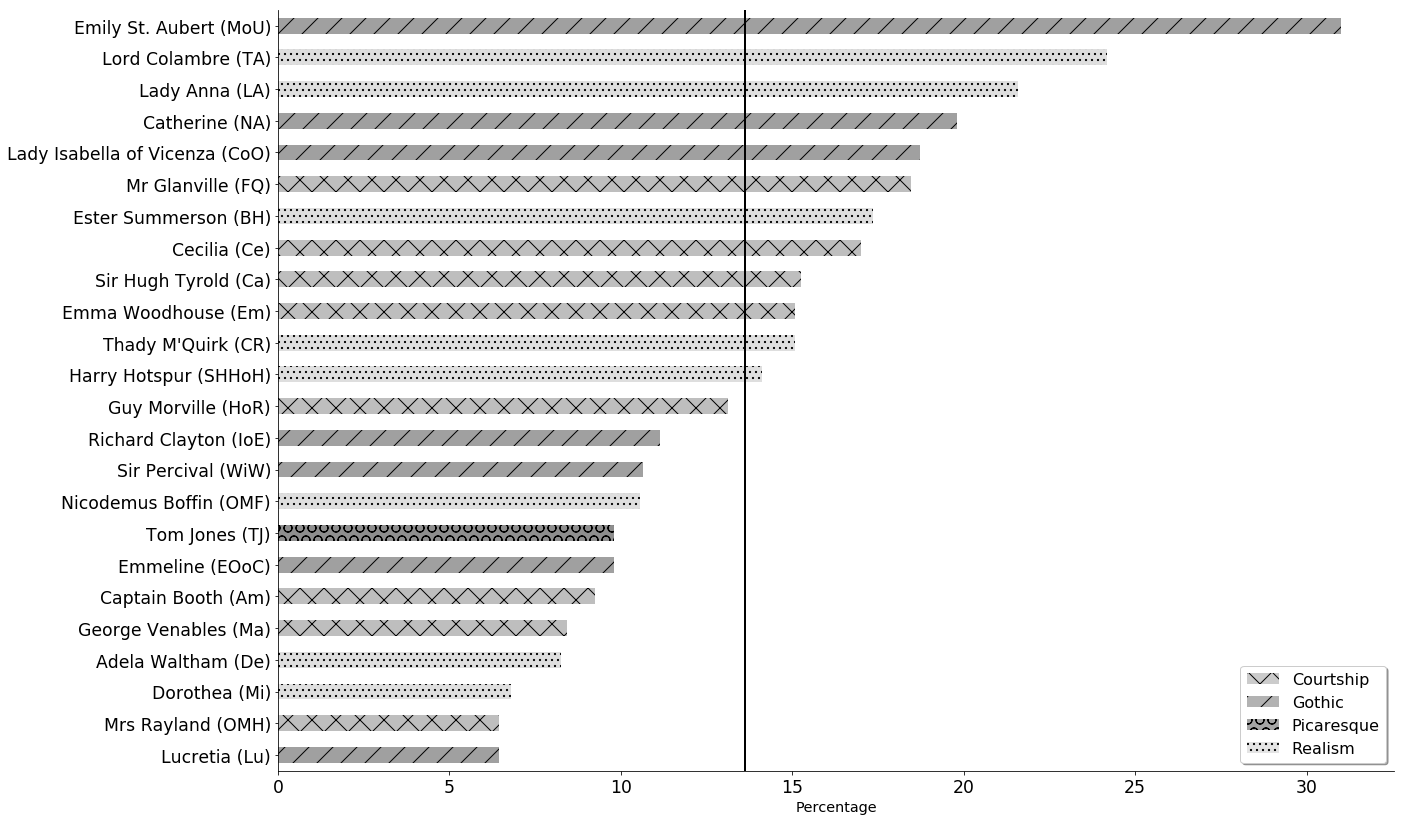

In [29]:
color_dict = {'Courtship':'darkgray', 'Realism': 'lightgray', 'Gothic':'gray', 'Picaresque': 'dimgray'}

ax = data.plot(kind="barh",x="name", y="percentage", 
                          figsize=(20,14), legend=False, 
                         color=data['genre'].apply(lambda x: color_dict[x]),
                          alpha=0.75, fontsize="xx-large")

num_locations = len(data.sort_values("percentage").genre.unique())
hatches = cycle(['/', '.', 'x', 'O'])
for i, bar in enumerate(ax.patches):
    if data["genre"][i] == "Courtship":
        bar.set_hatch("x")
    elif data["genre"][i] == "Gothic":
        bar.set_hatch("/")
    elif data["genre"][i] == "Picaresque":
        bar.set_hatch('O')
    elif data["genre"][i] == "Realism":
        bar.set_hatch("..")
    
a_val = 0.6
circ1 = matplotlib.patches.Patch(facecolor="darkgray",alpha=a_val,hatch='x',label='Courtship')
circ2= matplotlib.patches.Patch(facecolor="gray",alpha=a_val,hatch='/',label='Gothic')
circ3 = matplotlib.patches.Patch(facecolor="dimgray",alpha=a_val,hatch='O', label='Picaresque')
circ4= matplotlib.patches.Patch(facecolor="lightgray",alpha=a_val,hatch='..',label='Realism')


ax.legend(scatterpoints=1,
           loc='best',
           handles = [circ1, circ2,circ3, circ4],
           ncol=1,
           markerscale=0.5,
           fontsize=16,
           fancybox=True, 
           shadow=True)


ax.axvline(data["percentage"].median(), 
           color='black', linewidth=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xticks(rotation=90)

ax.set_ylabel("", rotation=90, fontsize="x-large")
ax.set_xlabel("Percentage",fontsize="x-large")
ax.invert_yaxis()
ax.figure.savefig("/Users/au564346/Desktop/Figure1.all_characters+no_1st_person.jpeg", dpi=300, bbox_inches = "tight")

In [ ]:
ax.invert_yaxis()

In [ ]:
tf = tf[~tf["name"].isin(["Maud", "Jane Eyre", "Pip", "Roderick Random", "Gabriel Outcast", "Thady M'Quirk", "Ester Summerson"])]

In [ ]:
max_all_actors["name"] = max_all_actors["name"].str.replace("_", ' ', regex=True)

In [ ]:
max_all_actors.at[18, 'name'] = "Catherine Morland"

In [ ]:
tf

In [ ]:
data